# **Dataset collection**

Note : This dataset can be used for training and evaluating (i.e., a baseline) synonym extraction algorithms. Additionally, the construction of this dataset can also be used as an experiment to measure how much linguists (dis/)agree on synonymy.


This dataset is a cleaned version of the dataset collected by SinaLab - Bizreit University. It was collected by extending
a **given synset** with additional synonyms taking
into account **synonymy strength as a fuzzy value**.

Given a mono/multilingual synset and **a threshold
(a fuzzy value [0 − 1])**, our goal is to extract new
synonyms above this threshold **from existing lexicons**.

Twofold contributions:

- An algorithm and a benchmark dataset. The dataset consists of 3K candidate synonyms for 500 synsets.

- Each candidate synonym was annotated with a fuzzy value by four linguists. The dataset is important for :
      (i) understanding how much linguists (dis/)agree on synonymy, in addition to
      (ii) using the dataset as a baseline to evaluate the algorithm. The proposed algorithm extracts synonyms from existing lexicons and computes a fuzzy value for each candidate.
      
Evaluations show that the algorithm behaves like a linguist and its fuzzy values are close to those proposed by linguists (using RMSE and MAE). The dataset and a demo page are publicly available at https:
//portal.sina.birzeit.edu/synonyms.

**The fuzzy scoring scale - synonymy strength**

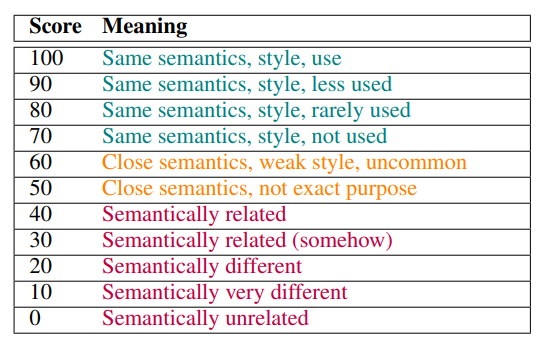**

In [ ]:
import pandas as pd

df = pd.read_csv('df_words_ar_en.csv')

df = df.drop('id', axis=1)

# Display the resulting DataFrame

df

,synonyms,average,word
0,قَضِيَّة,40,شَأن|thing
1,مَسْألَة,75,شَأن|thing
2,أمْر,"72,5",شَأن|thing
3,شَيء,80,شَأن|thing
4,شَهْر شَمْسِيّ,"72,5",شَهْر|month
...,...,...,...
2999,نَوَوِيّ,"47,5",ذَرِّيّ|atomic
3000,نَوَوِي,"47,5",ذَرِّيّ|atomic
3001,ذَرِّي,100,ذَرِّيّ|atomic
3002,خُصُوصَاً,95,بِشَكْل خَاص | بِطَرِيقَة خَاصَّة|especially |...


In [ ]:
# Replace | with space
df['word'] = df['word'].str.replace(' ', '_')

In [ ]:
# Replace | with space
df['word'] = df['word'].str.replace('|', ' ')

<ipython-input-60-d214380dc4bc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['word'] = df['word'].str.replace('|', ' ')


In [ ]:
def filter_arabic_words(text):
    return ' '.join([word for word in str(text).split() if not any(c.isalpha() and ord(c) < 128 for c in word)])

# Apply the function to the 'word' column
df['word'] = df['word'].apply(filter_arabic_words)


**Check number of rows with more than one word**

In [ ]:
import re

# Custom function to count words in a cell
def count_arabic_words(text):
    # Remove non-Arabic characters (assuming Arabic words are in the text)
    arabic_text = re.sub(r'[^ء-ي\s]', '', text)

    # Split the text into words and count them
    words_count = len(arabic_text.split())

    return words_count

# Apply the custom function to the DataFrame column
df['Word_Count'] = df['word'].apply(count_arabic_words)

# Filter rows with more than 1 word
filtered_df = df[df['Word_Count'] > 1]

filtered_df

In [ ]:
df

,synonyms,average,word
0,قَضِيَّة,40,شَأن
1,مَسْألَة,75,شَأن
2,أمْر,"72,5",شَأن
3,شَيء,80,شَأن
4,شَهْر شَمْسِيّ,"72,5",شَهْر
...,...,...,...
2999,نَوَوِيّ,"47,5",ذَرِّيّ
3000,نَوَوِي,"47,5",ذَرِّيّ
3001,ذَرِّي,100,ذَرِّيّ
3002,خُصُوصَاً,95,بِشَكْل_خَاص_ _بِطَرِيقَة_خَاصَّة


In [ ]:
df['word'] = df['word'].str.replace('_ _', ';')

In [ ]:
df['word'] = df['word'].str.replace('_', ' ')
df

,synonyms,average,word
0,قَضِيَّة,40,شَأن
1,مَسْألَة,75,شَأن
2,أمْر,"72,5",شَأن
3,شَيء,80,شَأن
4,شَهْر شَمْسِيّ,"72,5",شَهْر
...,...,...,...
2999,نَوَوِيّ,"47,5",ذَرِّيّ
3000,نَوَوِي,"47,5",ذَرِّيّ
3001,ذَرِّي,100,ذَرِّيّ
3002,خُصُوصَاً,95,بِشَكْل خَاص;بِطَرِيقَة خَاصَّة


In [ ]:
# Group by the 'word' column and aggregate synonyms for each group
grouped_df = df.groupby('word')['synonyms'].agg(list).reset_index()
grouped_df

,word,synonyms
0,,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,أبْدَعَ;خَلَقَ,"[أَدَّى إِلَى, بَنَى, أَنْشَأَ, عَمِلَ, أَنْجَ..."
2,أبْيَض,[قَوْقَازِي]
3,أخْبَار,"[خَبَر, نَبَأ]"
4,أرْبَكَ;حَيَّرَ,"[شَوَّشَ, أزْعَجَ, أقْلَقَ, خَرْبَطَ, أَزْعَجَ..."
...,...,...
475,وَقْت,"[تَوْقِيت, سَاعَة, وَقْت مُنَاسِب, مَوْعِد, فُ..."
476,وَكِيل,"[وَسِيط, سَمْسَار, دَلاَل, عَامِل, مَنْدُوب, ع..."
477,وِجْهَة نَظَر,"[نَظْرَة, مَنْظُور]"
478,يَقَظَة,"[سُهْد, سُهَاد, سَهَر, أَرَق, إِنْعِدَام النَّ..."


In [ ]:
rows = grouped_df[grouped_df['word'] == 'شَأن']
rows

,word,synonyms
227,شَأن,"[قَضِيَّة, مَسْألَة, أمْر, شَيء]"


# **Save new dataset**

In [ ]:
df.to_csv('synset_sinalab.csv', index=False)

In [ ]:
grouped_df.to_csv('synset_sinalab_grouped.csv', index=False)

# **References**

https://github.com/SinaLab/Synonyms

https://www.jarrar.info/publications/GJJB23.pdf